In [ ]:
!wget https://statso.io/wp-content/uploads/2022/12/Jobs.zip

--2023-04-11 17:17:41--  https://statso.io/wp-content/uploads/2022/12/Jobs.zip
Resolving statso.io (statso.io)... 192.0.78.25, 192.0.78.24
Connecting to statso.io (statso.io)|192.0.78.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1457606 (1.4M) [application/zip]
Saving to: ‘Jobs.zip’

Jobs.zip            100%[===================>]   1.39M  --.-KB/s    in 0.1s    

2023-04-11 17:17:42 (11.9 MB/s) - ‘Jobs.zip’ saved [1457606/1457606]



In [ ]:
!unzip /content/Jobs.zip

Archive:  /content/Jobs.zip
   creating: Jobs/
  inflating: Jobs/jobs.csv           


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [ ]:
data = pd.read_csv("/content/Jobs/jobs.csv")

In [ ]:
data.shape

(27010, 8)

In [ ]:
data.head(3)

,Unnamed: 0,Job Salary,Job Experience Required,Key Skills,Role Category,Functional Area,Industry,Job Title
0,0,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,1,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,2,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive


In [ ]:
data = data.drop("Unnamed: 0",axis=1)

In [ ]:
data.isnull().sum()

Job Salary                 0
Job Experience Required    0
Key Skills                 0
Role Category              0
Functional Area            0
Industry                   0
Job Title                  0
dtype: int64

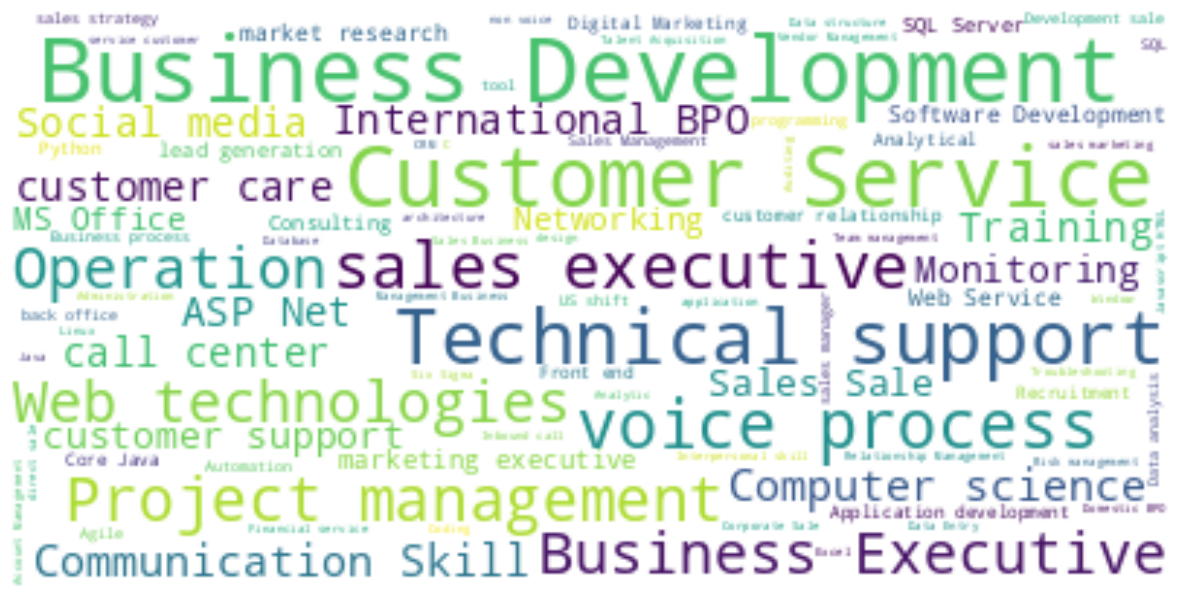

In [ ]:
text = " ".join(i for i in data["Key Skills"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

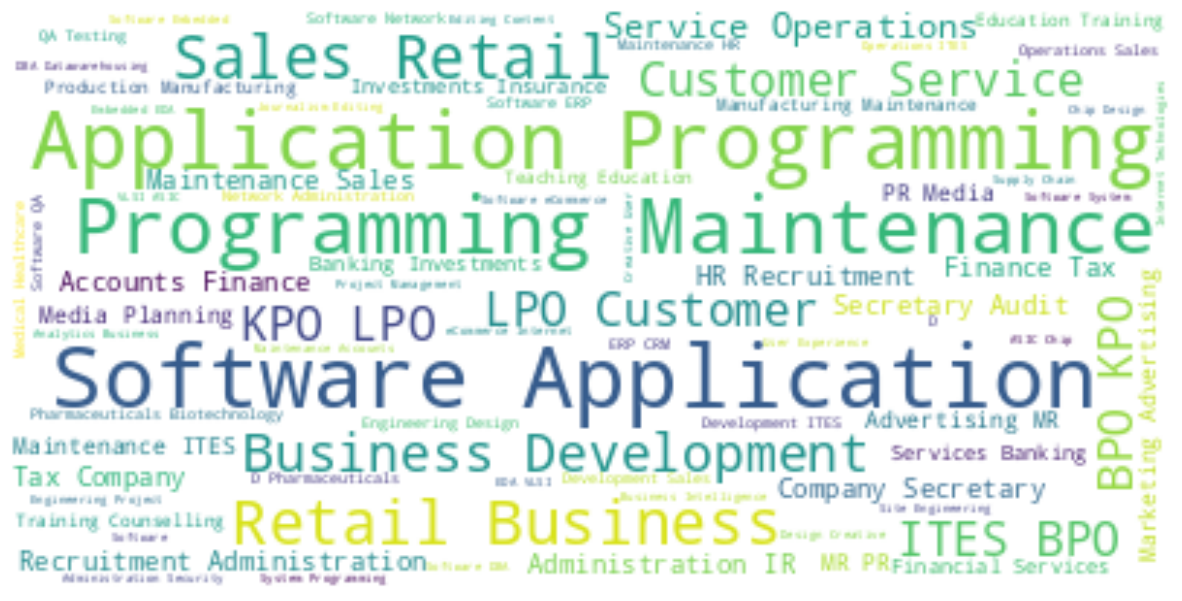

In [ ]:
text = " ".join(i for i in data["Functional Area"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

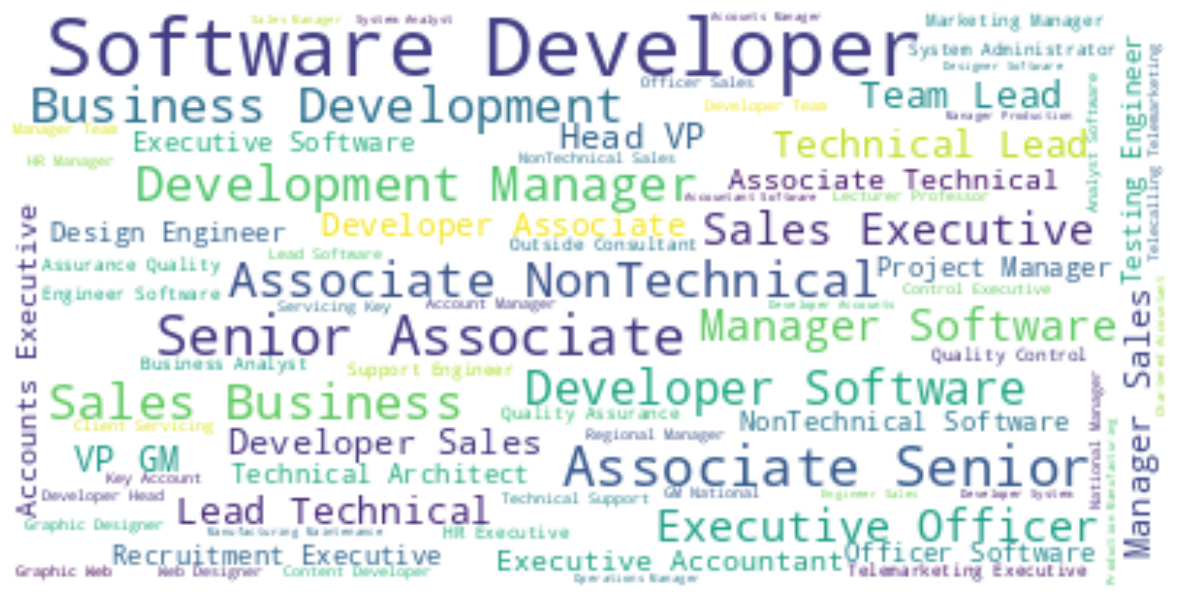

In [ ]:
text = " ".join(i for i in data["Job Title"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem.wordnet import WordNetLemmatizer

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(word) for word in tokens]
    # Join tokens to form preprocessed text
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

data['Key Skills'] = data['Key Skills'].apply(preprocess_text)

vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(data['Key Skills'].values)

In [ ]:
similarity = cosine_similarity(x)

In [ ]:
similarity.shape

(27010, 27010)

In [ ]:
similarity[0]

array([1., 0., 0., ..., 0., 0., 0.])

In [ ]:
indices = pd.Series(data.index, index=data['Job Title']).drop_duplicates()

In [ ]:
indices

Job Title
Media Planning Executive/Manager                  0
Sales Executive/Officer                           1
R&D Executive                                     2
Technical Support Engineer                        3
Testing Engineer                                  4
                                              ...  
Software Developer                            27005
Operations Manager                            27006
Lecturer/Professor                            27007
Software Developer                            27008
Search Engine Optimisation /SEO Specialist    27009
Length: 27010, dtype: int64

In [ ]:
def jobs_recommendation(Title, similarity = similarity):
    index = indices[Title]
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[::], reverse=True)
    similarity_scores = similarity_scores[0:5]
    newsindices = [i[0] for i in similarity_scores]
    return data[['Job Title', 'Job Experience Required', 
                 'Key Skills']].iloc[newsindices]

jobs_recommendation("Software Developer")

,Job Title,Job Experience Required,Key Skills
6249,Sales/Business Development Manager,4 - 5 yrs,networking printing aerospace raw material sur...
6248,Software Developer,2 - 5 yrs,php mvc laravel aws sdlc wordpress lamp oops m...
6247,Associate/Senior Associate -(NonTechnical),5 - 10 yrs,data analysis investment banking financial ser...
6246,Software Developer,1 - 6 yrs,coding wordpress commerce html troubleshooting
6245,Associate/Senior Associate -(NonTechnical),1 - 4 yrs,client servicing client support background ver...


In [ ]:
jobs_recommendation("Operations Manager")

,Job Title,Job Experience Required,Key Skills
135,Restaurant Manager,5 - 7 yrs,assistant restaurant manager restaurant restau...
134,Software Developer,5 - 10 Years,detail designjunipersmsc engineerroutingip net...
133,Business Analyst,1 - 3 yrs,data analysis automation google analytics exce...
132,Associate/Senior Associate -(Technical),2 - 5 yrs,technical support executive electrical enginee...
131,Head/VP/GM-Technology(IT)/CTO,4 - 8 yrs,c python six sigma pmp net html javascript sql...
